In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Correlations Between Housing Price and COVID Datasets

We have investigated both the housing price index and COVID-19 data sets separately, now we have combined the data sets into a single data frame.  

In order to more easily plot the data over the different time periods, we will filter the data set to each calendar quarter of 2020.

In [2]:
#read csv file into data frame
df = pd.read_csv('metro_year_over_year_change_2020_with_covid.csv', index_col = 0)
#take the log of the quarterly per capita infection rate
df['log_rate'] = np.log10(df['new_cases_per_capita_1000'])
#create dataframes for each quarter
q1 = df[(df.Quarter == 1)]
q2 = df[(df.Quarter == 2)]
q3 = df[(df.Quarter == 3)]
q4 = df[(df.Quarter == 4)]
df.describe()

,Place ID,Year,Quarter,HPI,YoY change,% YoY change,year dec. quarter,total_covid_cases,population,new_cases,total_covid_per_capita_1000,new_cases_per_capita_1000,log_rate
count,1614.000000,1614.0,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1.614000e+03,1614.000000,1614.000000,1614.000000,1614.000000
mean,29850.964064,2020.0,2.501859,236.476636,11.626233,5.207651,2020.375465,15331.721190,6.788420e+05,10146.849442,22.322683,15.512599,0.622752
std,11389.474445,0.0,1.117824,51.734597,5.495951,2.066175,0.279456,41565.415375,1.087483e+06,26339.703991,27.194357,18.725172,0.935585
min,10180.000000,2020.0,1.000000,140.250000,-29.750000,-6.724228,2020.000000,2.000000,2.263000e+04,2.000000,0.015362,0.015362,-1.813554
25%,20020.000000,2020.0,2.000000,197.207500,8.270000,3.951862,2020.250000,317.250000,1.479700e+05,289.250000,0.886802,0.795927,-0.099130
50%,29540.000000,2020.0,3.000000,225.510000,11.095000,5.153267,2020.500000,3077.000000,2.650660e+05,2467.500000,10.347992,7.361220,0.866949
75%,39880.000000,2020.0,3.750000,268.772500,14.630000,6.449355,2020.687500,12689.750000,6.973820e+05,8572.750000,34.657589,23.849215,1.377474
max,49740.000000,2020.0,4.000000,440.640000,41.500000,13.853128,2020.750000,770915.000000,1.003911e+07,500616.000000,142.854927,102.947677,2.012617


To begin our analysis, we will look at scatter plots of the quarterly per capita incident rate of COVID against  percentage change in HPI.  To help us understand more about these datasets, we will also include a histogram of each data set in the plot.  To do this efficiently, we will write a short function.

In [3]:
#define a function to add histograms to a scatter plot
def scatter_hist_log(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha = 0.3)
    

    # now determine limits :
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    xlim = (int(np.max(np.abs(x)))+1)*binwidth
    lim = (int(xymax/binwidth) + 1) * binwidth
    xbins = np.arange(0.01, 100, binwidth)
    

    bins = np.arange(-lim, lim + binwidth, binwidth)
    logbins = np.logspace(np.log10(xbins[0]),np.log10(xbins[-1]),len(bins))
    
    ax_histx.hist(x, bins=logbins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    

Now we will look at the entire year's data.

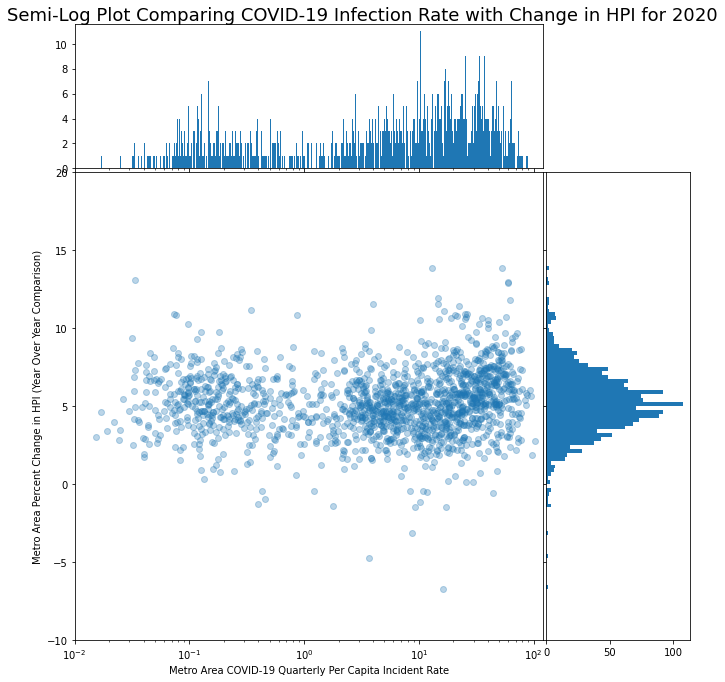

In [4]:
#define x y
x = df['new_cases_per_capita_1000']
y = df['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
fig.suptitle('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for 2020', fontsize = 18)
ax.set_xlabel('Metro Area COVID-19 Quarterly Per Capita Incident Rate')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)




This plot has some very interesting features.  The histogram of COVID incident rates seems to be bimodal. To investigate this further, let's look at the same plot with each quarter's data.

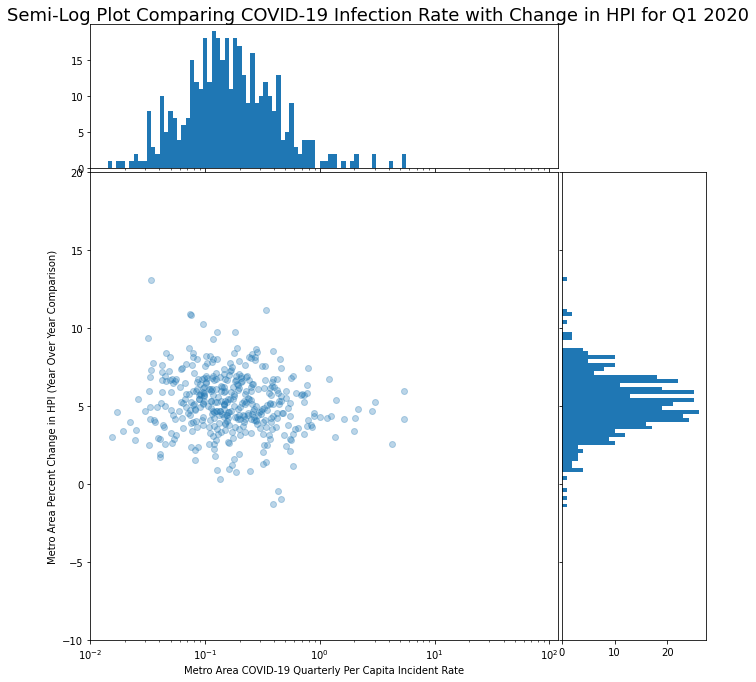

In [5]:
#define x y
x = q1['new_cases_per_capita_1000']
y = q1['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
fig.suptitle('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q1 2020', fontsize = 18)
ax.set_xlabel('Metro Area COVID-19 Quarterly Per Capita Incident Rate')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)





For the first quarter of the year COVID rates were low, and as we saw in the housing market analysis, the house price index did not seem to react on a market level.  Looking at the above plot, we see a natural distribution of both housing price index changes, and covid rates. There is no evidence in a bimodal distribution of COVID for the quarter. 

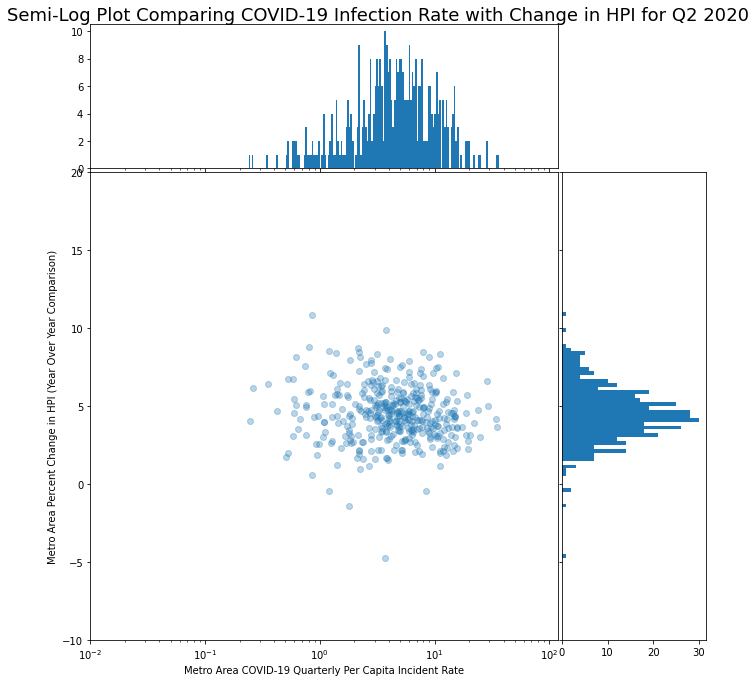

In [6]:
#define x y
x = q2['new_cases_per_capita_1000']
y = q2['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
fig.suptitle('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q2 2020', fontsize = 18)
ax.set_xlabel('Metro Area COVID-19 Quarterly Per Capita Incident Rate')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)


In the second quarter, the COVID rate distribution moved to the right and the HPI change moved down.  If this trend were to continue we could conclude that a negative correlation exists between these data.  That is to say that lower housing price growth is correlated to higher COVID rates.  This COVID rate histogram has a greater spread than in the first quarter, and appears to be more skewed, but does not appear to be bimodal.

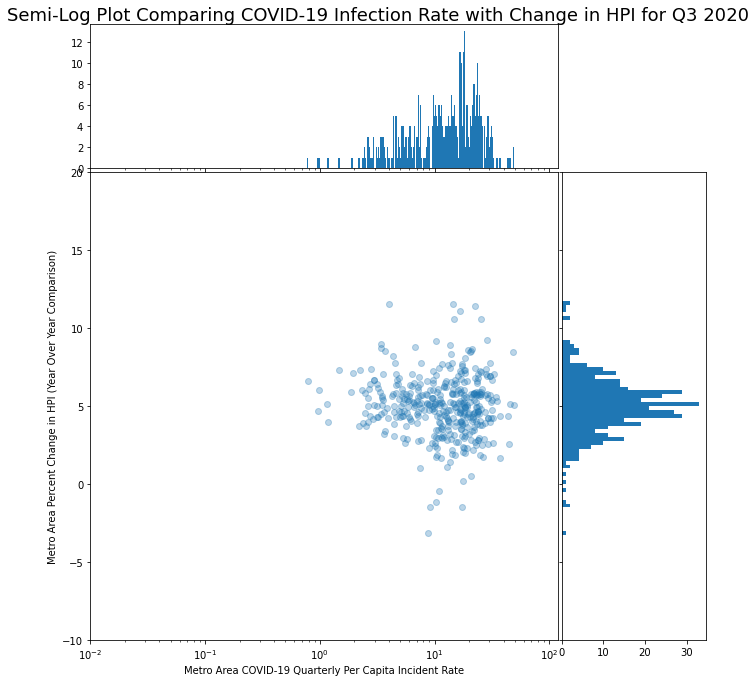

In [7]:
#define x y
x = q3['new_cases_per_capita_1000']
y = q3['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
fig.suptitle('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q3 2020', fontsize = 18)
ax.set_xlabel('Metro Area COVID-19 Quarterly Per Capita Incident Rate')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)

The third quarter distribution of COVID rates is even more spread out than in the second quarter, and it also continues to move to the right.  The change in HPI however moves upwards.  Housing prices grew faster even though the incident rate of COVID also grew.  

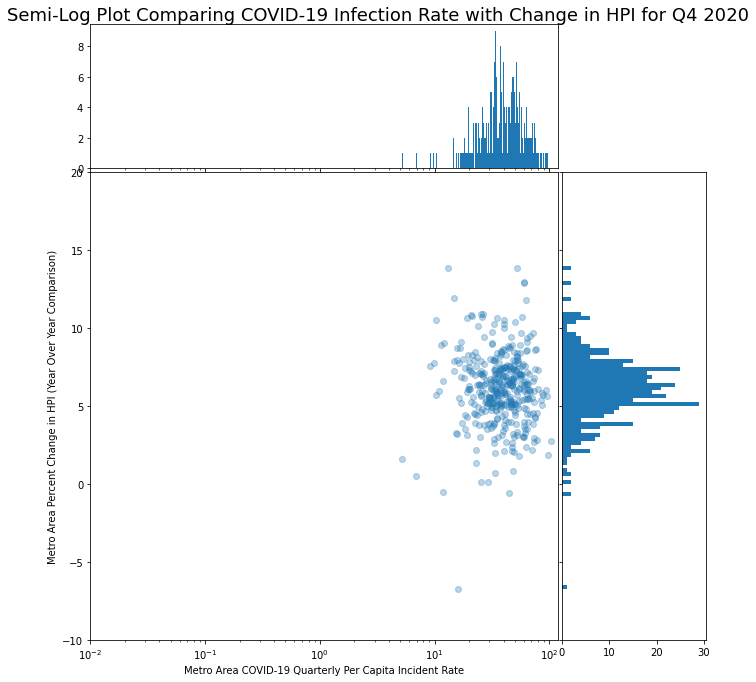

In [8]:
#define x y
x = q4['new_cases_per_capita_1000']
y = q4['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
fig.suptitle('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q4 2020', fontsize = 18)
ax.set_xlabel('Metro Area COVID-19 Quarterly Per Capita Incident Rate')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)

In the fourth quarter the COVID rate distribution continues to move to the right, and the standard deviation decreases.  In this same period, the housing price index change distribution widened while moving upward on average.  This indicates greater geographic variability, and possibly more volatility.  

It appears that the bimodal appearance of the COVID rate histogram in the yearly plot is an artifact of the growth of COVID and the coarse timescale of the combined data set.

Let us look at the progression of this data in a slightly different plot.  We will combine all four quarters into a single row, and add an ellipses on each quarter showing a three standard deviation boundary.  This will allow us to see if the movement or shape of the datasets indicates any correlation over time.

<Figure size 432x288 with 0 Axes>

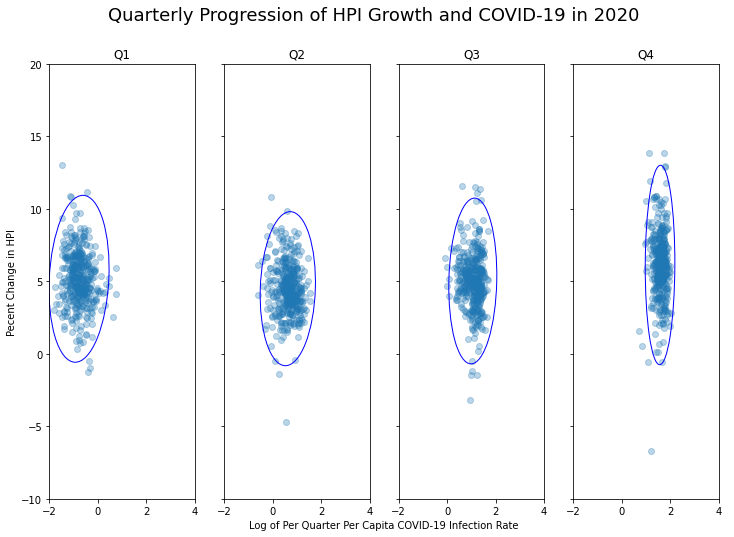

In [9]:
#set x & y for each quarter
x1 = q1['log_rate']
y1 = q1['% YoY change']
x2 = q2['log_rate']
y2 = q2['% YoY change']
x3 = q3['log_rate']
y3 = q3['% YoY change']
x4 = q4['log_rate']
y4 = q4['% YoY change']
#instantiate the figure, set its size
fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
#make big subplot for labeling
ax = fig.add_subplot(111)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

#Make sub plot for Q1
ax1 = fig.add_subplot(141)
cov = np.cov(x1, y1)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x1), np.mean(y1)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax1.add_artist(ell)
ax1.scatter(x1, y1, alpha =0.3)
ax1.set_xlim([-2, 4])
ax1.set_ylim([-10, 20])
ax1.set_title('Q1')
ax1.set_ylabel('Pecent Change in HPI')
#make sub plot for Q2
ax2 = fig.add_subplot(142, sharey=ax1)
cov = np.cov(x2, y2)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x2), np.mean(y2)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax2.add_artist(ell)
ax2.scatter(x2, y2, alpha =0.3)
ax2.set_xlim([-2, 4])
ax2.set_title('Q2')

#make sub plot for Q3
ax3 = fig.add_subplot(143, sharey=ax1)
cov = np.cov(x3, y3)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x3), np.mean(y3)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax3.add_artist(ell)
ax3.scatter(x3, y3, alpha =0.3)
ax3.set_xlim([-2, 4])
ax3.set_title('Q3')

#make sub plot for Q4
ax4 = fig.add_subplot(144, sharey=ax1)
cov = np.cov(x4, y4)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x4), np.mean(y4)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax4.add_artist(ell)
ax4.scatter(x4, y4, alpha =0.3)
ax4.set_xlim([-2, 4])
ax4.set_title('Q4')

ax.set_xlabel('Log of Per Quarter Per Capita COVID-19 Infection Rate')
fig.suptitle('Quarterly Progression of HPI Growth and COVID-19 in 2020', fontsize = 18)

#hide un-needed y axis numbers
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.show()

In the above plot we see that the vertical and horizontal movement of the ellipse representing the combined COVID and HPI data sets appear to be independent of each other.  The COVID rates move to the right every quarter, and the housing price index changes go down in quarter 2 , and up in quarters 3 and 4.  

Let's see if there are any correlations in the data that we have not yet investigated.  We will do this by leveraging Pandas correlation function, and plotting the results as a heatmap

Text(0.5, 0.98, 'Correlation Heatmap of HPI and COVID Data Features')

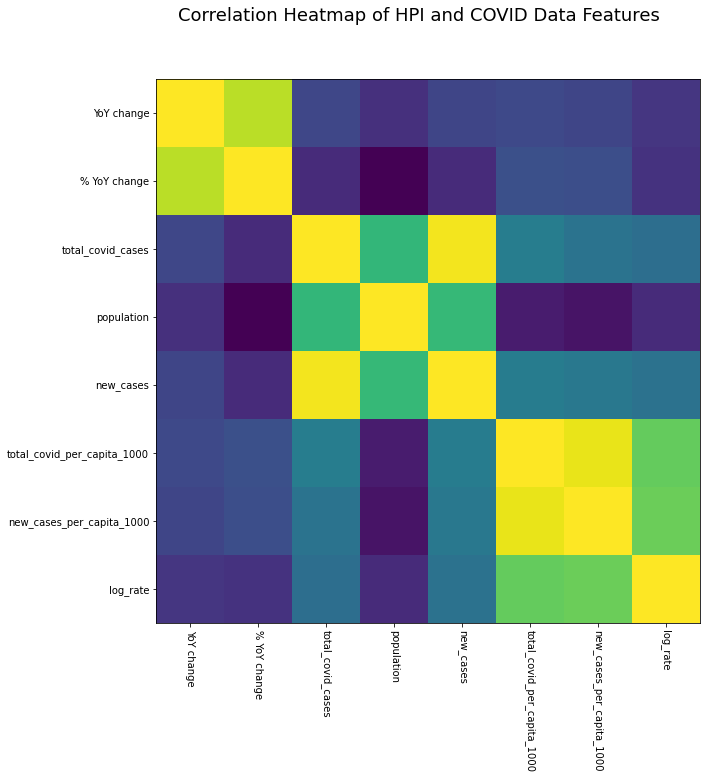

In [10]:
df_s = df[['YoY change', '% YoY change', 'total_covid_cases', \
           'population', 'new_cases', 'total_covid_per_capita_1000', \
          'new_cases_per_capita_1000', 'log_rate']]
cols =list(df_s.columns)
corr = df_s.corr()
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(cols)),cols,rotation=-90)
plt.yticks(range(len(cols)), cols)
plt.imshow(corr, cmap = 'viridis', interpolation = 'nearest'  )
fig.suptitle('Correlation Heatmap of HPI and COVID Data Features', fontsize = 18)

This heat map shows lighter colors when there are stronger correlations between data features.  This is the reason for the bright yellow diagonal showing that each feature correlates perfectly with itself.  Unsurprisingly the change in the HPI index and the percentage change are highly correlated.    Also unsurprisingly, there is a strong correlation between the total number of cases, and the number of new cases.  Both these numbers are weakly correlated with the population of the area investigated.  More people means there are more cases.  When we look at COVID on a per capita basis we still see that total number of cases is correlated to the number of new cases in a quarter.  

There appear to be no hidden correlations between the housing data and the COVID data to be gleaned from this data set. If we had housing  price data on a finer time scale, and  a finer geographic scale, there may be local correlations that are not present at this scale. However, these data sets appear to be completely independent of each other.